# **Clustering Algorithms Demonstration**

Clustering is a fundamental technique in machine learning and data analysis that involves grouping similar data points together based on intrinsic patterns or features, without prior knowledge of specific categories. By identifying inherent structures within datasets, clustering algorithms reveal meaningful relationships and dependencies, providing valuable insights into the underlying organization of the data. Unlike supervised learning methods, clustering operates in an unsupervised manner, making it particularly useful for exploring datasets where the labels or groupings are unknown. Common applications of clustering span a wide range of domains, from customer segmentation in marketing to image segmentation in computer vision, showcasing its versatility in uncovering hidden structures within diverse datasets. As a key component of unsupervised learning, clustering plays a pivotal role in organizing and simplifying complex datasets, aiding researchers and analysts in making sense of intricate patterns and relationships.

In this notebook all 10 scikit-learn clustering methods ( available right [here](https://scikit-learn.org/stable/modules/classes.html) ) will be explained and applied over this exercise [dataset](https://www.kaggle.com/datasets/joonasyoon/clustering-exercises?select=basic3.csv).

## Loading Dataset

### Libraries used

In [1]:
import pandas as pd
import sys

sys.path.append('../src')

%matplotlib inline
from graphic import Graphic

from generator import Generator

sys.path.remove('../src')

### Loading

In [2]:
base_path = '../dataset/'

files = [
    'basic1', 'basic2', 'basic3', 'basic4', 'basic5', 'blob',
    'box', 'boxes', 'boxes2', 'boxes3', 'chrome', 'dart',
    'dart2', 'face', 'hyperplane', 'isolation', 'lines', 'lines2',
    'network', 'outliers', 'ring', 'sparse', 'spiral', 'spiral2',
    'spirals', 'supernova', 'triangle', 'un', 'un2', 'wave',        
]

dataframes = {}
for file in files:
    dataframes[file] = pd.read_csv(base_path + file + '.csv')

## Visualizing Data

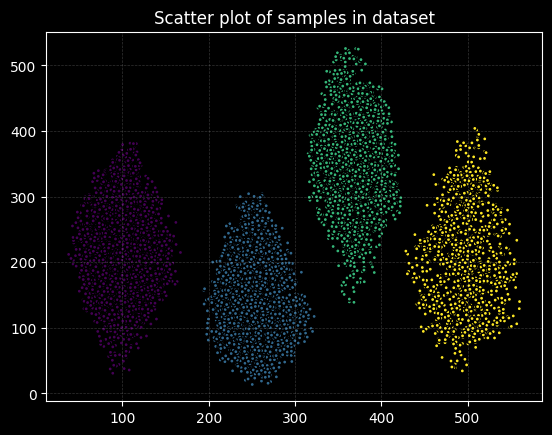

In [4]:
g = Graphic()
basic1 = dataframes['basic1']
g.sample(X=basic1, y=basic1['color'])

## K-Means

### _Bisecting K-Means_

### _Mini Batch K-Means_

## DBSCAN

## HDBSCAN

## Affinity Propagation

## Agglomerative Clustering

## Feature Agglomeration

## Birch

## Mean Shift

## OPTICS

## Spectral Clustering

### _Spectral Biclustering_

### _Spectral Coclustering_